<a href="https://colab.research.google.com/github/fred-creator-creat/Calculo-Metricas-Matriz-Confusao/blob/main/Calculo_Metricas_Matriz_Confusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install -q tensorflow

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

print(tf.__version__)

2.19.0


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

In [24]:
# Definindo a estrutura
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

# Compilando
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinando
history = model1.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.8919 - loss: 0.3490 - val_accuracy: 0.9850 - val_loss: 0.0483
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9855 - loss: 0.0464 - val_accuracy: 0.9873 - val_loss: 0.0375
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9895 - loss: 0.0328 - val_accuracy: 0.9882 - val_loss: 0.0327
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9900 - val_loss: 0.0362
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9948 - loss: 0.0168 - val_accuracy: 0.9901 - val_loss: 0.0310


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


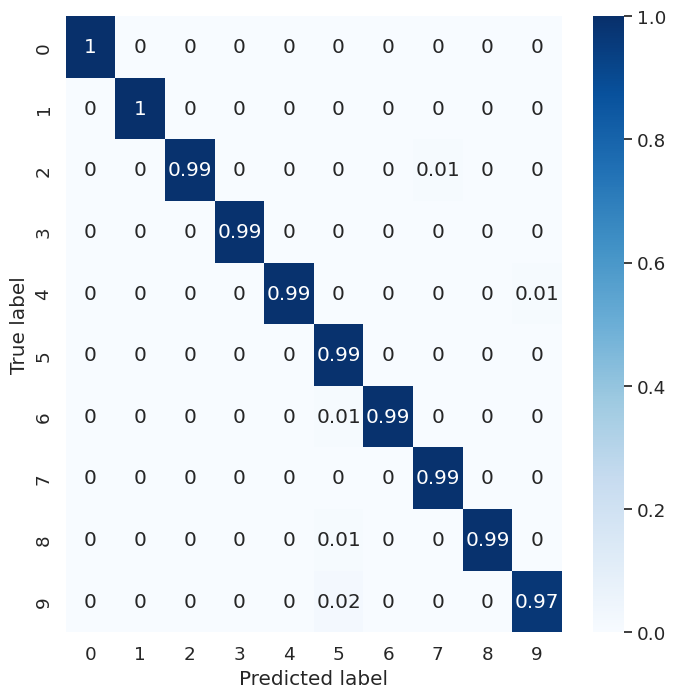

In [ ]:
# 1. Gerar as previsões do modelo
y_true = test_labels
y_pred = np.argmax(model1.predict(test_images), axis=-1)

# 2. Definir as classes (0 a 9)
classes = [0,1,2,3,4,5,6,7,8,9]

# 3. Criar a matriz de confusão
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

# 4. Normalizar os valores
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

# 5. Converter para DataFrame para facilitar a visualização
con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

# 6. Gerar o gráfico (Heatmap)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
# Total de elementos (N)
N = np.sum(con_mat)

# Exemplo para a Classe 0:
VP = con_mat[0, 0] # Verdadeiro Positivo
FP = np.sum(con_mat[:, 0]) - VP # Falso Positivo
FN = np.sum(con_mat[0, :]) - VP # Falso Negativo
VN = N - (VP + FP + FN) # Verdadeiro Negativo

# Aplicando as fórmulas exatas do enunciado:
sensibilidade = VP / (VP + FN) #
especificidade = VN / (FP + VN) #
acuracia = (VP + VN) / N #
precisao = VP / (VP + FP) #
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade) #

# Exibindo os resultados
print(f"Sensibilidade: {sensibilidade:.4f}")
print(f"Especificidade: {especificidade:.4f}")
print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"F-score: {f_score:.4f}")

Sensibilidade: 0.9959
Especificidade: 0.9996
Acurácia: 0.9992
Precisão: 0.9959
F-score: 0.9959
